<a href="https://colab.research.google.com/github/thehouseisonfire/t1/blob/main/C%C3%B3pia_de_TrabalhoT3_TopicosEspeciais_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALUNOS: Pedro Spegiorin (2111100026) e Pedro Dariva (2111100009)

## Trabalho T3 - Redes Neurais Recorrentes

Este trabalho tem como objetivo a compreensão de como se dá o processo de treinamento de uma rede neural artificial (RNA) do tipo recorrente. A execução deste exercício permitirá aos estudantes o domínio dos métodos de regularização necessários para o treinamento e, posteriormente, de teste de uma RNA utilizando um dataset pré-processado.

## 1. Instruções

O estudante deve treinar uma RNA com camadas recorrentes e densas, no estilo para uma tarefa de classificação utilizando dataset pré-processado conforme especificado abaixo.

Para cada tentativa de construção de arquitetura, mantenha um registro da tentativa e resultado obtido pela rede. Indique qual a lógica utilizada para criação da arquitetura e qual a percepção do resultado em comparação com tentativas anteriores.

Para este trabalho, somente serão permitidas somente as seguintes bibliotecas `python` para o treinamento da RNA:

- `numpy`
- `scipy`
- `tensorflow`
- `scikit-learn`

Para visualização e criação de gráficos, também serão permitidas

- `matplotlib`
- `seaborn`
- `plotly`
- `yellowbrick`

Caso a utilização de quaisquer outras bibliotecas se faça necessária, uma consulta prévia deve ser feita ao professor.


## Entrega

O presente trabalho pode ser feito individualmente ou em dupla. Caso optem pelo trabalho em dupla, o cabeçalho do documento deve indicar quais são os componentes e suas matrículas.

A entrega deverá ser feita através do envio de um arquivo `ZIP` contendo o trabalho dos estudantes, no SIGAA. A data limite para entrega deste trabalho é **19/11/2023, 23h59m**.


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import random as python_random

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
train, train_info = tfds.load('paws_wiki', split='train', with_info=True, batch_size=-1)
valid, valid_info = tfds.load('paws_wiki', split='validation', with_info=True, batch_size=-1)
test, test_info = tfds.load('paws_wiki', split='test', with_info=True, batch_size=-1)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/49401 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0.incompleteHBRPOI/paws_wiki-train.t…

Generating validation examples...:   0%|          | 0/8000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0.incompleteHBRPOI/paws_wiki-validat…

Generating test examples...:   0%|          | 0/8000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0.incompleteHBRPOI/paws_wiki-test.tf…

Dataset paws_wiki downloaded and prepared to /root/tensorflow_datasets/paws_wiki/labeled_final_tokenized/1.1.0. Subsequent calls will reuse this data.


In [ ]:
x_train, y_train = train['sentence1'] + ' <eos> ' + train['sentence2'] + ' <eos>', train['label']
x_valid, y_valid = valid['sentence1'] + ' <eos> ' + valid['sentence2'] + ' <eos>', valid['label']
x_test, y_test = test['sentence1'] + ' <eos> ' + test['sentence2'] + ' <eos>', test['label']

In [ ]:
import re
import string

def preprocess(texto):
    lowercase = tf.strings.lower(texto)
    return lowercase

text_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=30000,
    standardize=preprocess,
    output_mode='int',
    output_sequence_length=73)  # cuidado com o tamanho das sequencias
text_vectorizer.adapt(x_train)

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

### Dica para testar as predições:

```
# insira as frases de teste abaixo nas variáveis abaixo
frase1 = 'bad movie'
frase2 = 'incredible movie'


pred = model.predict(tf.convert_to_tensor([f'{frase1} <eos> {frase2} <eos>'], dtype=tf.string) )

print(f'Probabilidade classe 0: {(pred[0][0] * 100):.4f}% \nProbabilidade classe 1: {(pred[0][1] * 100):.4f}%')
```

## Inclua seu código abaixo desta célula

In [ ]:
phrases = [x.numpy().decode('utf-8').split() for x in x_train]

In [ ]:
len(np.unique(phrases))

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:272: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


49349

In [ ]:
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam, Adagrad
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

Tentativa #1:

Para começar o desenvolvimento, construimos um modelo basico baseado no tutorial de treinamento para RNNs para conseguir uma base. Usando uma camada SimpleRNN com iniciações 'padrões', um dropout baixo e apenas 10 epochs (dale paciencia), conseguimos um primeiro resultado modesto de 55% de acuracia.

Build model...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 73)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 73, 32)            960032    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                6208      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 966370 (3.69 MB)
Trainable params: 966370 (3.69 MB)
Non-trainable params: 0 (0.00 Byte)
___

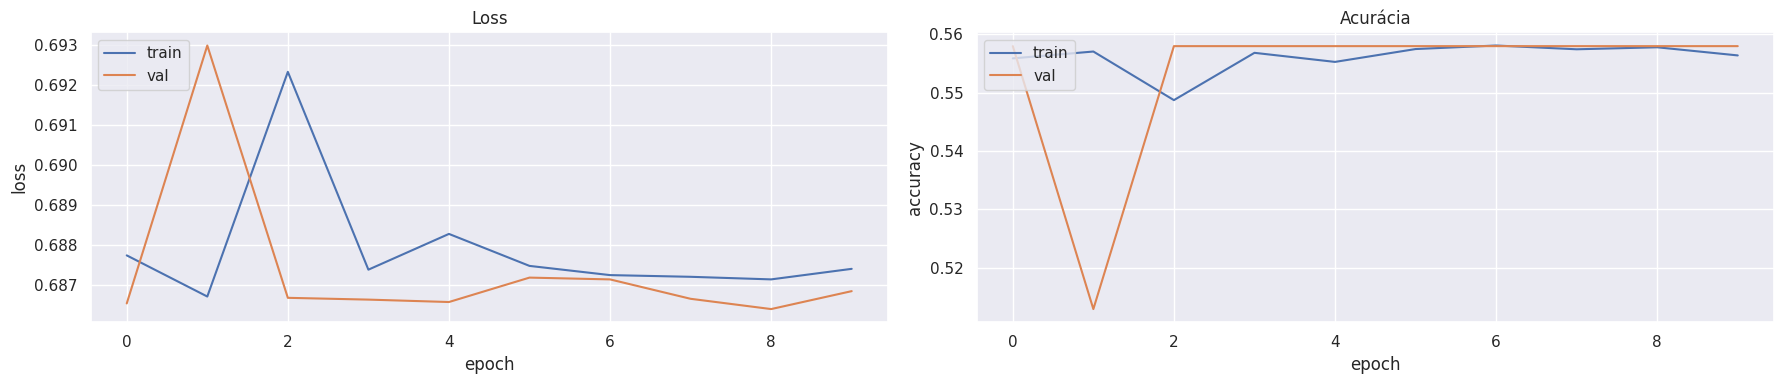

250/250 [==============================] - 3s 11ms/step
Acurácia: 0.5580


Demais métricas (separadas por classe): 
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      4464
           1       0.00      0.00      0.00      3536

    accuracy                           0.56      8000
   macro avg       0.28      0.50      0.36      8000
weighted avg       0.31      0.56      0.40      8000

[[4464    0]
 [3536    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 171ms/step
Probabilidade classe 0: 56.0206% 
Probabilidade classe 1: 43.9794%


In [ ]:
### model

print('Build model...')

model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(text_vectorizer)

model.add(tf.keras.layers.Embedding(30001, 32))

model.add(tf.keras.layers.SimpleRNN(64,
                                    use_bias=True,
                                    return_sequences=False, #altere para True quando tiver mais do que uma camada recorrente
                                    kernel_initializer= tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42),
                                    recurrent_dropout=0.0,
                                    bias_initializer='zeros'))


model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.summary()

### compiling

# aqui utilizaremos a função binary_crossentropy pois exatamente 2 classes e
# otimizador Adam enquanto monitoramos a evolução da acurácia para o modelo
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Plot

sns.set()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

# loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Loss')
ax1.set(xlabel='epoch', ylabel='loss')
ax1.legend(['train', 'val'], loc='upper left')

# acurácia
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Acurácia')
ax2.set(xlabel='epoch', ylabel='accuracy')
ax2.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()


### Metrics

y_pred = model.predict(x_test)
print('Acurácia: {:.4f}'.format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))))

print('\n\nDemais métricas (separadas por classe): ')
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

### testing

frase1 = 'bad movie'
frase2 = 'incredible movie'


pred = model.predict(tf.convert_to_tensor([f'{frase1} <eos> {frase2} <eos>'], dtype=tf.string) )

print(f'Probabilidade classe 0: {(pred[0][0] * 100):.4f}% \nProbabilidade classe 1: {(pred[0][1] * 100):.4f}%')

Tentativa #2:

Tendo esse teste feito, o primeiro instinto que temos é aumentar a quantidade de camadas para termos um fitting maior e um aumento no quesito de acuracia. Vendo que as camadas simpleRNN são recorrentes, setamos as novas 3 de seu tipo com return_sequences=True. Foi aqui que notamos a falha apresentada pela matriz de confusão: temos o modelo somente prevendo 'different_meaning', e por isso esse teste não mostrou resultado.

Build model...
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 73)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 73, 32)            960032    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 73, 64)            6208      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 73, 64)            8256      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                       

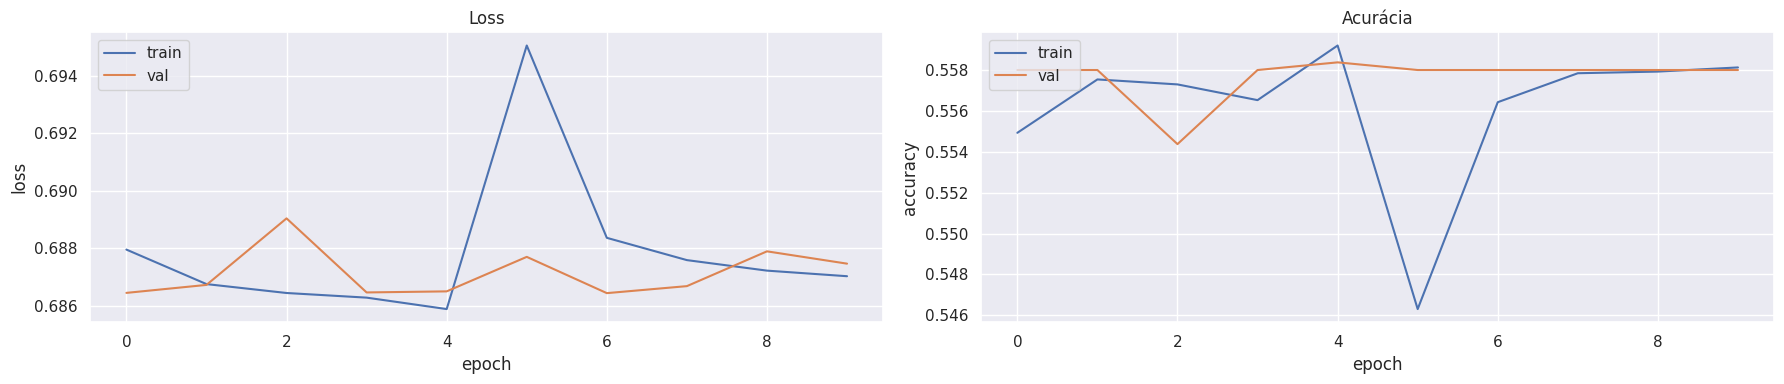

250/250 [==============================] - 6s 22ms/step
Acurácia: 0.5580


Demais métricas (separadas por classe): 
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      4464
           1       0.00      0.00      0.00      3536

    accuracy                           0.56      8000
   macro avg       0.28      0.50      0.36      8000
weighted avg       0.31      0.56      0.40      8000

[[4464    0]
 [3536    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 33ms/step
Probabilidade classe 0: 53.4648% 
Probabilidade classe 1: 46.1489%
Probabilidade classe 0: 53.4648% 
Probabilidade classe 1: 46.1489%
Probabilidade classe 0: 53.4648% 
Probabilidade classe 1: 46.1489%
Probabilidade classe 0: 53.4648% 
Probabilidade classe 1: 46.1489%
Probabilidade classe 0: 53.4648% 
Probabilidade classe 1: 46.1489%


In [ ]:
### model

print('Build model...')

model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(text_vectorizer)

model.add(tf.keras.layers.Embedding(30001, 32))

model.add(tf.keras.layers.SimpleRNN(64,
                                    use_bias=True,
                                    return_sequences=True, #altere para True quando tiver mais do que uma camada recorrente
                                    kernel_initializer= tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42),
                                    recurrent_dropout=0.0,
                                    bias_initializer='zeros'))

model.add(tf.keras.layers.SimpleRNN(64,
                                    use_bias=True,
                                    return_sequences=True, #altere para True quando tiver mais do que uma camada recorrente
                                    kernel_initializer= tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42),
                                    recurrent_dropout=0.0,
                                    bias_initializer='zeros'))

model.add(tf.keras.layers.SimpleRNN(64,
                                    use_bias=True,
                                    return_sequences=False, #altere para True quando tiver mais do que uma camada recorrente
                                    kernel_initializer= tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42),
                                    recurrent_dropout=0.0,
                                    bias_initializer='zeros'))


model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

model.summary()

### compiling

# aqui utilizaremos a função binary_crossentropy pois exatamente 2 classes e
# otimizador Adam enquanto monitoramos a evolução da acurácia para o modelo
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Plot

sns.set()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

# loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Loss')
ax1.set(xlabel='epoch', ylabel='loss')
ax1.legend(['train', 'val'], loc='upper left')

# acurácia
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Acurácia')
ax2.set(xlabel='epoch', ylabel='accuracy')
ax2.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()


### Metrics

y_pred = model.predict(x_test)
print('Acurácia: {:.4f}'.format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))))

print('\n\nDemais métricas (separadas por classe): ')
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

### testing

test_phrases = [
    ["bad apples", "rotten apples"],
    ["hotdogs are sandwiches", "aliens in space"],
    ["average acting", "mediocre performance"],
    ["the dog is dead", "solar radiation divided by cat"],
    ["I liked the movie, but it is bad", "the movie is good"],

]

predicts = []

for pair in test_phrases:
  predicts.append(model.predict(tf.convert_to_tensor([f'{pair[0]} <eos> {pair[1]} <eos>'], dtype=tf.string)))

for pred in predicts:
  print(f'Probabilidade classe 0: {(pred[0][0] * 100):.4f}% \nProbabilidade classe 1: {(pred[0][1] * 100):.4f}%')

Tentativa #3:

Considerando que a keras nos providencia com um mais de um tipo de camada recorrente alem da simpleRNN, rodamos um teste utilizando camadas de LSTM para compararmos seus desempenhos em isolamento. Considerando que camadas LSTM são XXX mais, esperamos ver um YYY de impacto nos resultados. Infelizmente, isso não se mostrou o caso. OBS: Treinamento havia sido completado, porem o merge do collab o apagou).

In [ ]:
print('Build model...')

model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(text_vectorizer)

model.add(tf.keras.layers.Embedding(30001, 32))

model.add(tf.keras.layers.LSTM(64,
                                    use_bias=True,
                                    return_sequences=False, #altere para True quando tiver mais do que uma camada recorrente
                                    kernel_initializer= tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42),
                                    recurrent_dropout=0.2,
                                    bias_initializer='zeros'))


model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.summary()

### compiling

# aqui utilizaremos a função binary_crossentropy pois exatamente 2 classes e
# otimizador SGD enquanto monitoramos a evolução da acurácia para o modelo
model.compile(loss='binary_crossentropy',
              optimizer="SGD",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=3,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Plot

sns.set()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

# loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Loss')
ax1.set(xlabel='epoch', ylabel='loss')
ax1.legend(['train', 'val'], loc='upper left')

# acurácia
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Acurácia')
ax2.set(xlabel='epoch', ylabel='accuracy')
ax2.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()


### Metrics

y_pred = model.predict(x_test)
print('Acurácia: {:.4f}'.format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))))

print('\n\nDemais métricas (separadas por classe): ')
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

### testing

frase1 = 'bad movie'
frase2 = 'incredible movie'


pred = model.predict(tf.convert_to_tensor([f'{frase1} <eos> {frase2} <eos>'], dtype=tf.string) )

print(f'Probabilidade classe 0: {(pred[0][0] * 100):.4f}% \nProbabilidade classe 1: {(pred[0][1] * 100):.4f}%')

Build model...
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 73)                0         
 Vectorization)                                                  
                                                                 
 embedding_18 (Embedding)    (None, 73, 32)            960032    
                                                                 
 lstm_4 (LSTM)               (None, 64)                24832     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 2)                 130       
                                                                 
Total params: 984994 (3.76 MB)
Trainable params: 984994 (3.76 MB)
Non-trainable params: 0 (0.00 Byte)
__

T4: Trocando do otimizador adam para SGD e diminuindo o tamanho dos batchs. !!! Inserir explicação aqui!!!. Isso finalmente resultou em aparições de previções de semelhança na matriz, insinuando que o tamanho do batch em relação as épocas pode ajudar com esse problema.

Build model...
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 73)                0         
 ctorization)                                                    
                                                                 
 embedding_3 (Embedding)     (None, 73, 32)            960032    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                6208      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 966370 (3.69 MB)
Trainable params: 966370 (3.69 MB)
Non-trainable params: 0 (0.00 Byte)
___

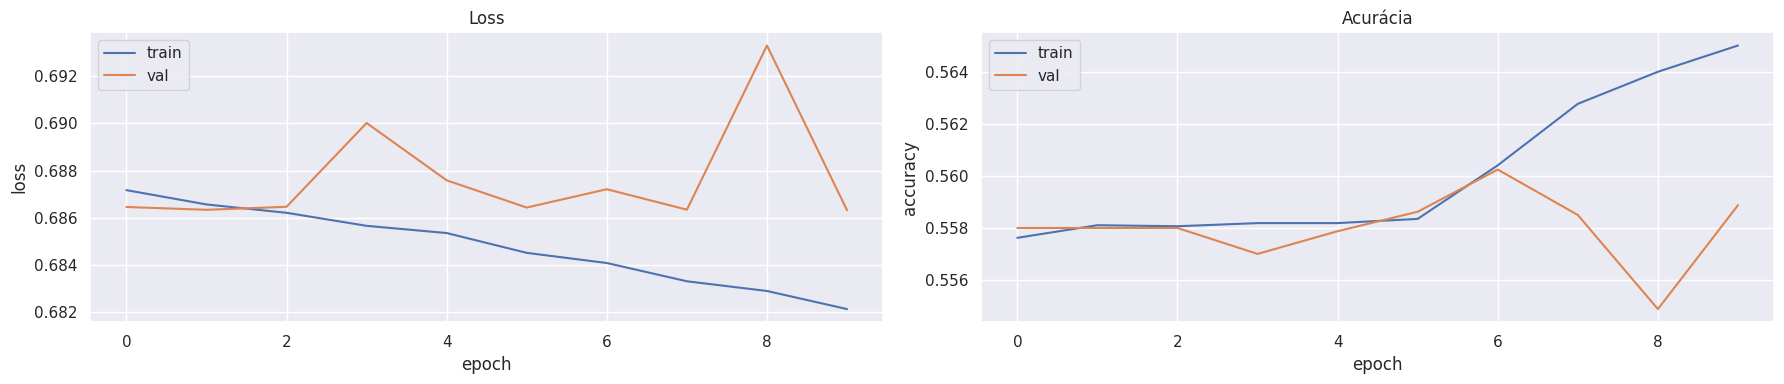

250/250 [==============================] - 3s 12ms/step
Acurácia: 0.5589


Demais métricas (separadas por classe): 
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      4464
           1       0.68      0.00      0.01      3536

    accuracy                           0.56      8000
   macro avg       0.62      0.50      0.36      8000
weighted avg       0.61      0.56      0.40      8000

[[4458    6]
 [3523   13]]
1/1 [==============================] - 0s 191ms/step
Probabilidade classe 0: 67.9049% 
Probabilidade classe 1: 32.0951%


In [ ]:
### model

print('Build model...')

model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(text_vectorizer)

model.add(tf.keras.layers.Embedding(30001, 32))

model.add(tf.keras.layers.SimpleRNN(64,
                                    use_bias=True,
                                    return_sequences=False, #altere para True quando tiver mais do que uma camada recorrente
                                    kernel_initializer= tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42),
                                    recurrent_dropout=0.0,
                                    bias_initializer='zeros'))


model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.summary()

### compiling

# aqui utilizaremos a função binary_crossentropy pois exatamente 2 classes e
# otimizador SGD enquanto monitoramos a evolução da acurácia para o modelo
model.compile(loss='binary_crossentropy',
              optimizer="SGD",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Plot

sns.set()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

# loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Loss')
ax1.set(xlabel='epoch', ylabel='loss')
ax1.legend(['train', 'val'], loc='upper left')

# acurácia
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Acurácia')
ax2.set(xlabel='epoch', ylabel='accuracy')
ax2.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()


### Metrics

y_pred = model.predict(x_test)
print('Acurácia: {:.4f}'.format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))))

print('\n\nDemais métricas (separadas por classe): ')
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

### testing

frase1 = 'bad movie'
frase2 = 'incredible movie'


pred = model.predict(tf.convert_to_tensor([f'{frase1} <eos> {frase2} <eos>'], dtype=tf.string) )

print(f'Probabilidade classe 0: {(pred[0][0] * 100):.4f}% \nProbabilidade classe 1: {(pred[0][1] * 100):.4f}%')


T5: Aumentamos o número de épocas e fizemos o batch duplo de tal número, vindo do resultado anterior. !!! Explicação aqui !!!. !!! Resultados aqui. !!!

In [ ]:
### model

print('Build model...')

model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(text_vectorizer)

model.add(tf.keras.layers.Embedding(30001, 32))

model.add(tf.keras.layers.LSTM(64,
                                    use_bias=True,
                                    return_sequences=True, #altere para True quando tiver mais do que uma camada recorrente
                                    kernel_initializer= tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42),
                                    recurrent_dropout=0.0,
                                    bias_initializer='zeros'))
model.add(tf.keras.layers.LSTM(64,
                                    use_bias=True,
                                    return_sequences=False, #altere para True quando tiver mais do que uma camada recorrente
                                    kernel_initializer= tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42),
                                    recurrent_dropout=0.0,
                                    bias_initializer='zeros'))



model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.summary()

### compiling

# aqui utilizaremos a função binary_crossentropy pois exatamente 2 classes e
# otimizador SGD enquanto monitoramos a evolução da acurácia para o modelo
model.compile(loss='binary_crossentropy',
              optimizer="SGD",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Plot

sns.set()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

# loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Loss')
ax1.set(xlabel='epoch', ylabel='loss')
ax1.legend(['train', 'val'], loc='upper left')

# acurácia
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Acurácia')
ax2.set(xlabel='epoch', ylabel='accuracy')
ax2.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()


### Metrics

y_pred = model.predict(x_test)
print('Acurácia: {:.4f}'.format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))))

print('\n\nDemais métricas (separadas por classe): ')
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

### testing

frase1 = 'bad movie'
frase2 = 'incredible movie'


pred = model.predict(tf.convert_to_tensor([f'{frase1} <eos> {frase2} <eos>'], dtype=tf.string) )

print(f'Probabilidade classe 0: {(pred[0][0] * 100):.4f}% \nProbabilidade classe 1: {(pred[0][1] * 100):.4f}%')

Build model...
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 73)                0         
 ctorization)                                                    
                                                                 
 embedding_6 (Embedding)     (None, 73, 32)            960032    
                                                                 
 lstm_5 (LSTM)               (None, 73, 64)            24832     
                                                                 
 lstm_6 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                       

Tentativa #6:

Vendo a tendencia do modelo em baixas épocas de prever quase unilateralmente para o lado de different meaning, testamos uma inicialização mais envolvida para testar se tal medida encontraria o modelo no passo certo mais rapidamente. Infelizmente, pelo menos para o ajuste de pesos inicias, esse resultado teve esparço fruto considerando aumento no tempo de treinamento.

Build model...
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 73)                0         
 Vectorization)                                                  
                                                                 
 embedding_13 (Embedding)    (None, 73, 32)            960032    
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 64)                6208      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 2)                 130       
                                                                 
Total params: 966370 (3.69 MB)
Trainable params: 966370 (3.69 MB)
Non-trainable params: 0 (0.00 Byte)
__

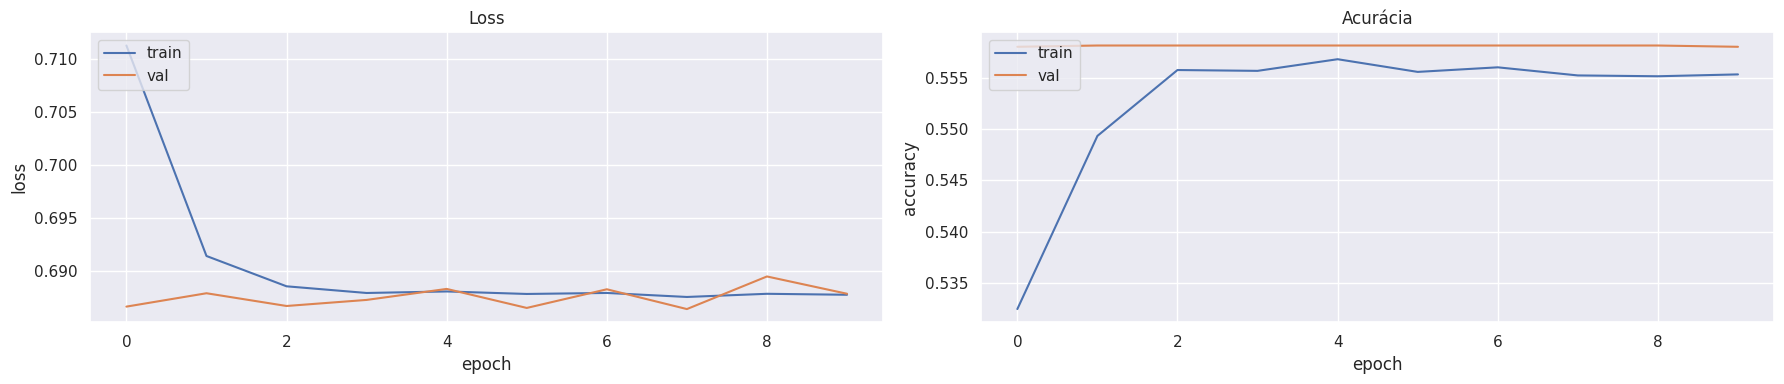

250/250 [==============================] - 2s 8ms/step
Acurácia: 0.5580


Demais métricas (separadas por classe): 
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      4464
           1       0.00      0.00      0.00      3536

    accuracy                           0.56      8000
   macro avg       0.28      0.50      0.36      8000
weighted avg       0.31      0.56      0.40      8000

[[4464    0]
 [3536    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 190ms/step
Probabilidade classe 0: 66.5291% 
Probabilidade classe 1: 33.4709%


In [ ]:
print('Build model...')

model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(text_vectorizer)

model.add(tf.keras.layers.Embedding(30001, 32))

model.add(tf.keras.layers.SimpleRNN(64,
                                    use_bias=True,
                                    return_sequences=False, #altere para True quando tiver mais do que uma camada recorrente
                                    kernel_initializer= tf.keras.initializers.RandomUniform(minval=-128, maxval=128, seed=42),
                                    recurrent_dropout=0.0,
                                    bias_initializer='zeros'))


model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.summary()

### compiling

# aqui utilizaremos a função binary_crossentropy pois exatamente 2 classes e
# otimizador SGD enquanto monitoramos a evolução da acurácia para o modelo
model.compile(loss='binary_crossentropy',
              optimizer="SGD",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Plot

sns.set()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

# loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Loss')
ax1.set(xlabel='epoch', ylabel='loss')
ax1.legend(['train', 'val'], loc='upper left')

# acurácia
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Acurácia')
ax2.set(xlabel='epoch', ylabel='accuracy')
ax2.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()


### Metrics

y_pred = model.predict(x_test)
print('Acurácia: {:.4f}'.format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))))

print('\n\nDemais métricas (separadas por classe): ')
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

### testing

frase1 = 'bad movie'
frase2 = 'incredible movie'


pred = model.predict(tf.convert_to_tensor([f'{frase1} <eos> {frase2} <eos>'], dtype=tf.string) )

print(f'Probabilidade classe 0: {(pred[0][0] * 100):.4f}% \nProbabilidade classe 1: {(pred[0][1] * 100):.4f}%')

Tentativa #7:

Aumento no numero de layers.

In [ ]:
### model

print('Build model...')

model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(text_vectorizer)

model.add(tf.keras.layers.Embedding(30001, 32))


model.add(tf.keras.layers.LSTM(64,
                                    use_bias=True,
                                    return_sequences=True, #altere para True quando tiver mais do que uma camada recorrente
                                    kernel_initializer= tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42),
                                    recurrent_dropout=0.0,
                                    bias_initializer='zeros'))
model.add(tf.keras.layers.LSTM(64,
                                    use_bias=True,
                                    return_sequences=False, #altere para True quando tiver mais do que uma camada recorrente
                                    kernel_initializer= tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42),
                                    recurrent_dropout=0.0,
                                    bias_initializer='zeros'))

model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.summary()

### compiling

# aqui utilizaremos a função binary_crossentropy pois exatamente 2 classes e
# otimizador SGD enquanto monitoramos a evolução da acurácia para o modelo
model.compile(loss='binary_crossentropy',
              optimizer="SGD",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Plot

sns.set()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

# loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Loss')
ax1.set(xlabel='epoch', ylabel='loss')
ax1.legend(['train', 'val'], loc='upper left')

# acurácia
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Acurácia')
ax2.set(xlabel='epoch', ylabel='accuracy')
ax2.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()


### Metrics

y_pred = model.predict(x_test)
print('Acurácia: {:.4f}'.format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))))

print('\n\nDemais métricas (separadas por classe): ')
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

### testing

frase1 = 'bad movie'
frase2 = 'incredible movie'


pred = model.predict(tf.convert_to_tensor([f'{frase1} <eos> {frase2} <eos>'], dtype=tf.string) )

print(f'Probabilidade classe 0: {(pred[0][0] * 100):.4f}% \nProbabilidade classe 1: {(pred[0][1] * 100):.4f}%')

Build model...
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 73)                0         
 Vectorization)                                                  
                                                                 
 embedding_22 (Embedding)    (None, 73, 32)            960032    
                                                                 
 lstm_11 (LSTM)              (None, 73, 64)            24832     
                                                                 
 lstm_12 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 2)                 130       
                                      

Tentativa ofuscada:

Diversos parametros foram testados antes de serem mudados nessa celula, dos quais foram apagados por baixo revelevancia e fracos resultados. Entre eles dropout recursivo (ainda mantido), inicialização do bias, remoção da camada de dropout, etc.

Build model...
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 73)                0         
 Vectorization)                                                  
                                                                 
 embedding_7 (Embedding)     (None, 73, 32)            960032    
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 64)                6208      
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 966370 (3.69 MB)
Trainable params: 966370 (3.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/3
386/386 [==============================] - 42s 95ms/step - 

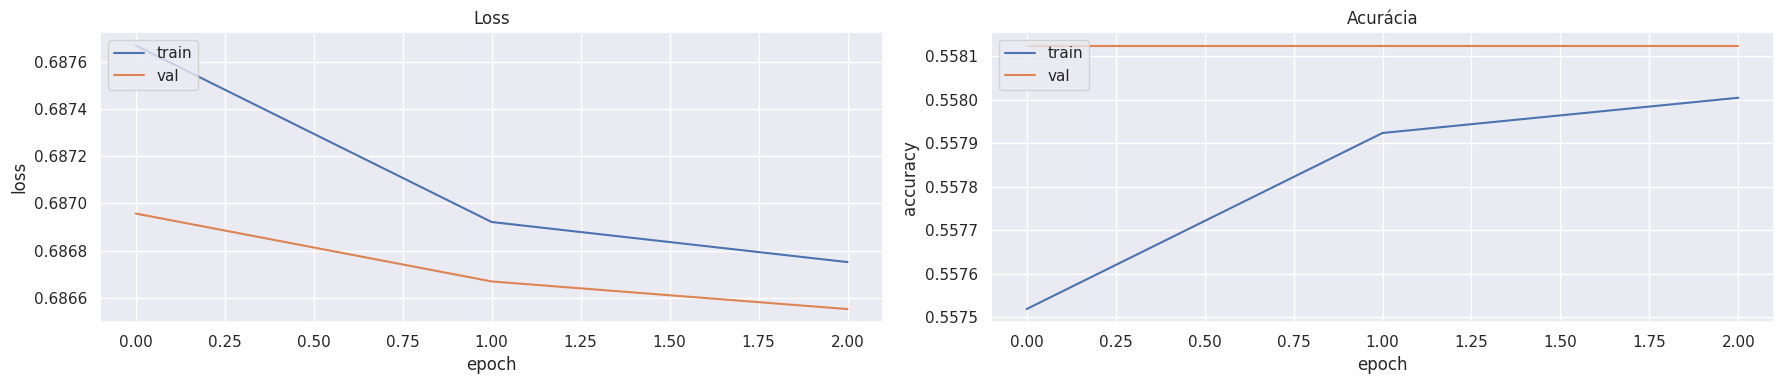

250/250 [==============================] - 3s 11ms/step
Acurácia: 0.5581


Demais métricas (separadas por classe): 
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      4464
           1       1.00      0.00      0.00      3536

    accuracy                           0.56      8000
   macro avg       0.78      0.50      0.36      8000
weighted avg       0.75      0.56      0.40      8000

[[4464    0]
 [3535    1]]
1/1 [==============================] - 0s 170ms/step
Probabilidade classe 0: 62.1068% 
Probabilidade classe 1: 37.8932%


In [ ]:
print('Build model...')

model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(text_vectorizer)

model.add(tf.keras.layers.Embedding(30001, 32))

model.add(tf.keras.layers.SimpleRNN(64,
                                    use_bias=True,
                                    return_sequences=False, #altere para True quando tiver mais do que uma camada recorrente
                                    kernel_initializer= tf.keras.initializers.RandomUniform(minval=-1, maxval=1, seed=42),
                                    recurrent_dropout=0.2,
                                    bias_initializer='zeros'))


#model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.summary()

### compiling

# aqui utilizaremos a função binary_crossentropy pois exatamente 2 classes e
# otimizador SGD enquanto monitoramos a evolução da acurácia para o modelo
model.compile(loss='binary_crossentropy',
              optimizer="SGD",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=3,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Plot

sns.set()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

# loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Loss')
ax1.set(xlabel='epoch', ylabel='loss')
ax1.legend(['train', 'val'], loc='upper left')

# acurácia
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Acurácia')
ax2.set(xlabel='epoch', ylabel='accuracy')
ax2.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()


### Metrics

y_pred = model.predict(x_test)
print('Acurácia: {:.4f}'.format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))))

print('\n\nDemais métricas (separadas por classe): ')
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

### testing

frase1 = 'bad movie'
frase2 = 'incredible movie'


pred = model.predict(tf.convert_to_tensor([f'{frase1} <eos> {frase2} <eos>'], dtype=tf.string) )

print(f'Probabilidade classe 0: {(pred[0][0] * 100):.4f}% \nProbabilidade classe 1: {(pred[0][1] * 100):.4f}%')